# Read Data

In [2]:
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv('Data/Credit Card Customer Data.csv',sep=';',engine='python')
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


Jumlah Baris dan Kolom

In [6]:
df.shape

(660, 7)

Menampilkan infomasi dari data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


# Data Cleaning

Menghitung total baris yang terduplikat

In [157]:
df.duplicated().sum()

0

Menghitung data bernilai null(missing value)

In [158]:
df.isnull().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

Menghapus kolom

In [8]:
drops = ['Sl_No','Customer Key']

df.drop(columns=drops, inplace=True)

Menampilkan beberapa baris teratas dari data frame

In [9]:
df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


# EDA 

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

Membuat data dalam bentuk histogram

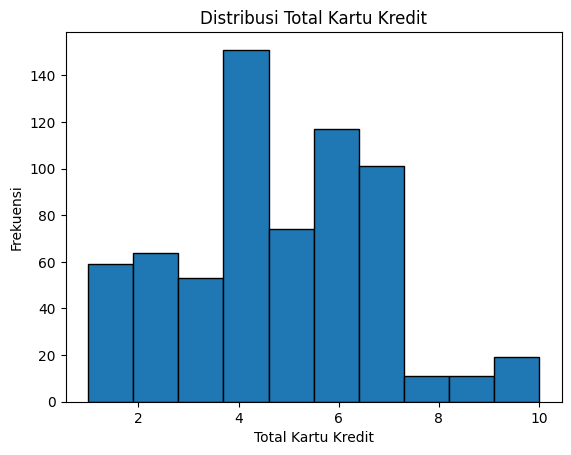

In [13]:
plt.hist(df['Total_Credit_Cards'], bins=10, edgecolor='black')
plt.xlabel('Total Kartu Kredit')
plt.ylabel('Frekuensi')
plt.title('Distribusi Total Kartu Kredit')
plt.show()

Melihat perbandingan nilai-nilai antara 2 kolom

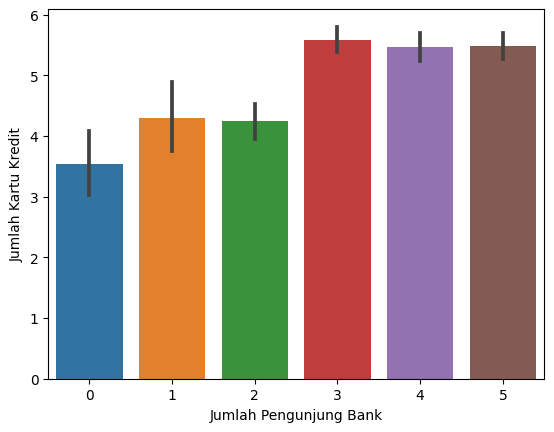

In [14]:
sns.barplot(x=df['Total_visits_bank'], y=df['Total_Credit_Cards'])
plt.xlabel('Jumlah Pengunjung Bank')
plt.ylabel('Jumlah Kartu Kredit')
plt.show()

Melihat distribusi rata-rata limit kartu kredit

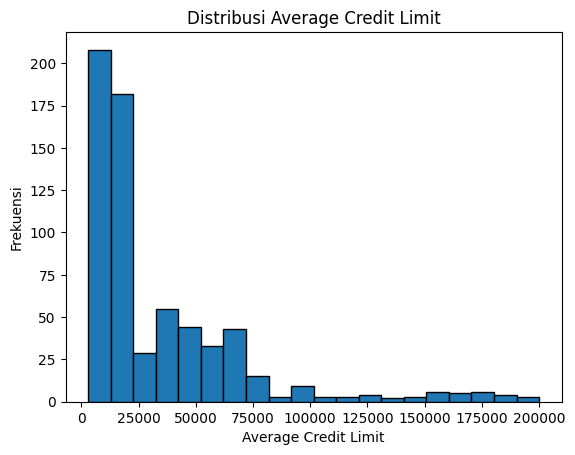

In [15]:
plt.hist(df['Avg_Credit_Limit'], bins=20, edgecolor='black')
plt.xlabel('Average Credit Limit')
plt.ylabel('Frekuensi')
plt.title('Distribusi Average Credit Limit')
plt.show()

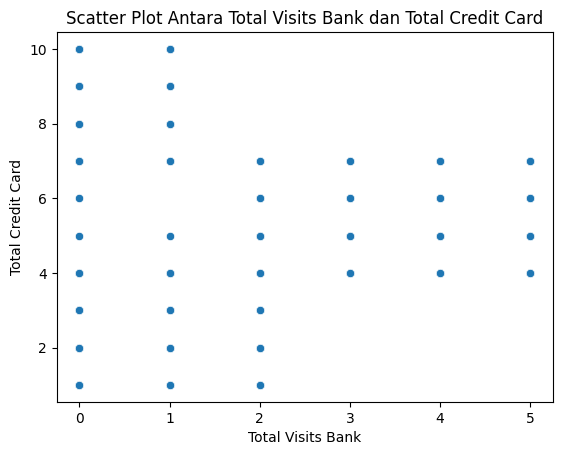

In [16]:
sns.scatterplot(x=df['Total_visits_bank'], y=df['Total_Credit_Cards'])
plt.xlabel('Total Visits Bank')
plt.ylabel('Total Credit Card')
plt.title('Scatter Plot Antara Total Visits Bank dan Total Credit Card')
plt.show()

Identifikasi Outlier

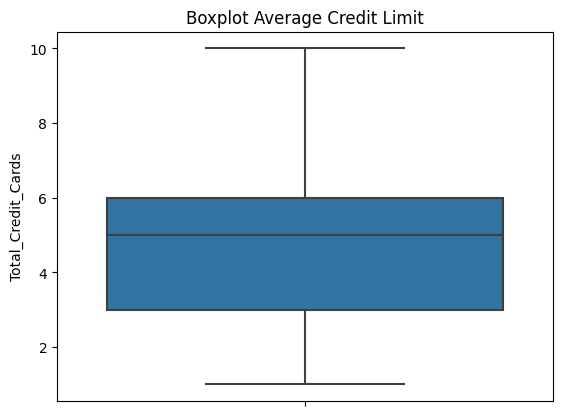

In [17]:
sns.boxplot(y=df['Total_Credit_Cards'])
plt.title('Boxplot Average Credit Limit')
plt.show()

In [18]:
df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


Heatmap dari matriks yang berkorelasi

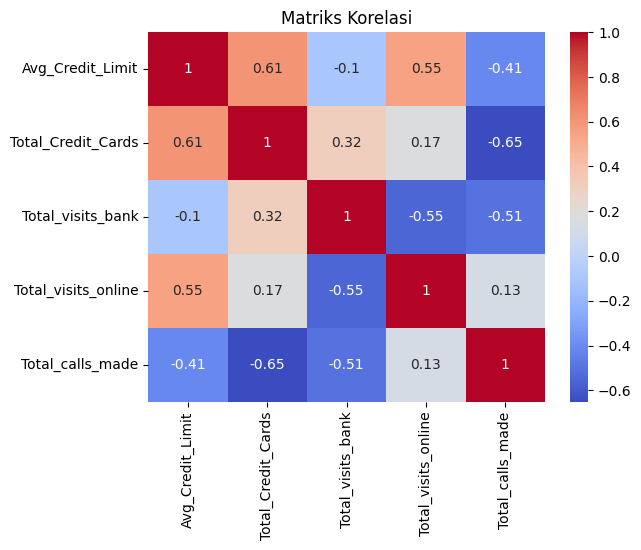

In [19]:
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriks Korelasi')
plt.show()

# Preprocessing

In [26]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score

In [32]:
X_scaled = df[['Total_Credit_Cards','Total_visits_bank']].values
#X_scaled = df[['Avg_Credit_Limit','Total_Credit_Cards','Total_visits_bank','Total_visits_online','Total_calls_made']].values

Normalisasi Data

In [33]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_scaled)

Melihat persebaran titik dan menentukan jumlah cluster

In [55]:
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

c:\Users\skaha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\skaha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\skaha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\skaha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

Melihat jumlah cluster

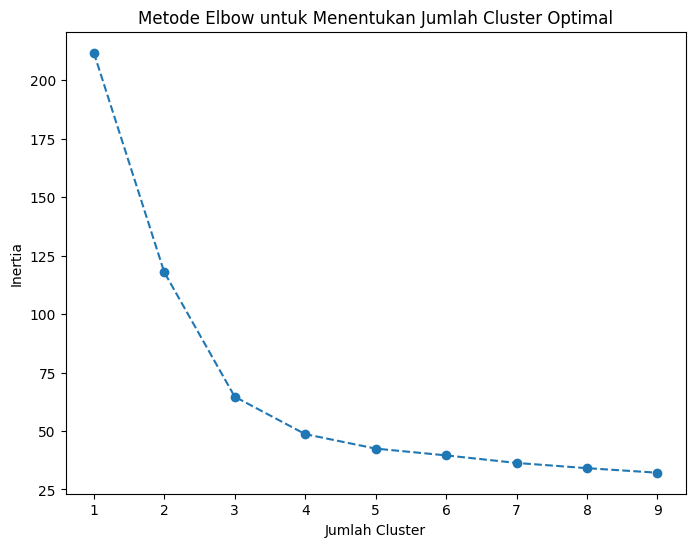

In [56]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 10), inertia, marker='o', linestyle='--')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia')
plt.title('Metode Elbow untuk Menentukan Jumlah Cluster Optimal')
plt.show()

In [57]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X_scaled)

c:\Users\skaha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=0)

Menetapkan setiap titik data dalam X_scaled

In [58]:
y_cluster = kmeans.fit_predict(X_scaled)

c:\Users\skaha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Melihat label cluster

In [59]:
y_cluster

array([0, 1, 0, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Menambahkan kolom baru 'Cluster' pada tabel

In [60]:
df['Cluster'] = kmeans.labels_

In [61]:
df

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Cluster
0,100000,2,1,1,0,0
1,50000,3,0,10,9,1
2,50000,7,1,3,4,0
3,30000,5,1,1,4,1
4,100000,6,0,12,3,2
...,...,...,...,...,...,...
655,99000,10,1,10,0,2
656,84000,10,1,13,2,2
657,145000,8,1,9,1,2
658,172000,10,1,15,0,2


Mengelompokkan data berdasarkan cluster dan menghitung rata-rata

In [62]:
df.groupby('Cluster').mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Cluster,,,,,
0,33792.207792,5.516883,3.496104,0.981818,1.994805
1,12253.333333,2.422222,0.933333,3.542222,6.857778
2,141040.000000,8.740000,0.600000,10.900000,1.080000


Mengukur/melihat kualitas clustering data

In [63]:
silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
(f"Silhouette Score: {silhouette_avg}")

'Silhouette Score: 0.5254186541442241'

Menentukan centroid

In [64]:
centroid = kmeans.cluster_centers_

In [65]:
centroid

array([[0.15630562, 0.5018759 , 0.69922078, 0.06545455, 0.19948052],
       [0.04697124, 0.15802469, 0.18666667, 0.23614815, 0.68577778],
       [0.70071066, 0.86      , 0.12      , 0.72666667, 0.108     ]])

Melihat hubungan antara 2 kolom

Text(0, 0.5, 'Total pengunjung Bank')

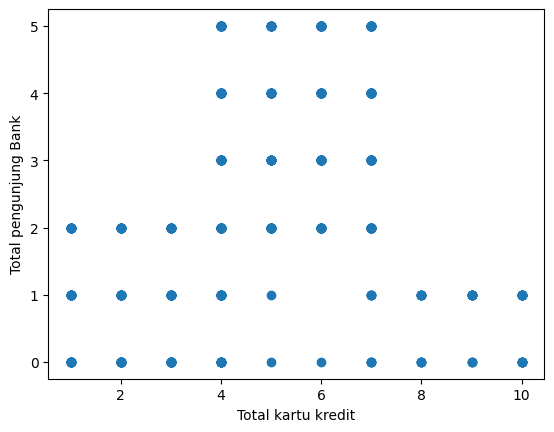

In [66]:
plt.scatter(df["Total_Credit_Cards"], df["Total_visits_bank"])
plt.xlabel("Total kartu kredit")
plt.ylabel("Total pengunjung Bank")

In [67]:
df

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Cluster
0,100000,2,1,1,0,0
1,50000,3,0,10,9,1
2,50000,7,1,3,4,0
3,30000,5,1,1,4,1
4,100000,6,0,12,3,2
...,...,...,...,...,...,...
655,99000,10,1,10,0,2
656,84000,10,1,13,2,2
657,145000,8,1,9,1,2
658,172000,10,1,15,0,2


C:\Users\skaha\AppData\Local\Temp\ipykernel_3796\1113044147.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(centroid[0,0],centroid[0,1],cmap='blue',marker='*',s=150, label='Centroid 0')
C:\Users\skaha\AppData\Local\Temp\ipykernel_3796\1113044147.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(centroid[1,0],centroid[1,1],cmap='orange',marker='*',s=150, label='Centroid 1')
C:\Users\skaha\AppData\Local\Temp\ipykernel_3796\1113044147.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(centroid[2,0],centroid[2,1],cmap='green',marker='*',s=150, label='Centroid 2')


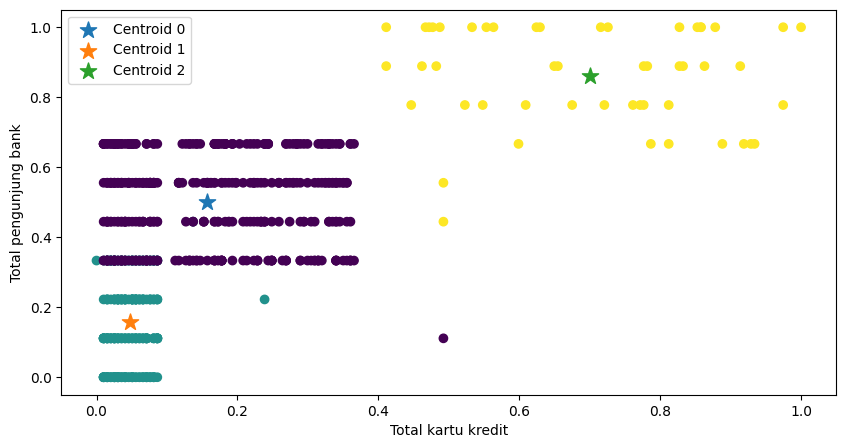

In [68]:
plt.figure(figsize = (10,5))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=kmeans.labels_)
plt.scatter(centroid[0,0],centroid[0,1],cmap='blue',marker='*',s=150, label='Centroid 0')
plt.scatter(centroid[1,0],centroid[1,1],cmap='orange',marker='*',s=150, label='Centroid 1')
plt.scatter(centroid[2,0],centroid[2,1],cmap='green',marker='*',s=150, label='Centroid 2')
plt.xlabel("Total kartu kredit")
plt.ylabel("Total pengunjung bank")
plt.legend()
plt.show()